## 1. Import libraries

In [341]:
#import needed libs
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np



## 2. Uploading and preparing the data 

In [342]:
#Load the data train and test
#note we are using standardized data from pre_processing_data.
df = pd.read_csv('clean_data.csv')
df['Txn_date'] = pd.to_datetime(df['Txn_date'])
df.set_index('Txn_date', inplace=True)



In [343]:

df = pd.read_csv('pre_processing_data/train_data.csv')
df['Txn_date'] = pd.to_datetime(df['Txn_date'])
df.set_index('Txn_date', inplace=True)

In [344]:
df_resampled = df.resample('D').mean()

/var/folders/wd/2sf_363j2qgdyy46qr3rysph0000gn/T/ipykernel_27195/3340561475.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample('D').mean()


In [345]:
len(df_resampled)

730

In [346]:
num_lags = 40

In [357]:
for lag in range(1, num_lags + 1):
    df_resampled[f'Total_Amt_lag_{lag}'] = df_resampled['Total_Amt'].shift(lag)


df_resampled.dropna(inplace=True)

# Split the data into features and target
X = df_resampled[[f'Total_Amt_lag_{lag}' for lag in range(1, num_lags + 1)]]
y = df_resampled['Total_Amt']

In [348]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)



In [349]:

model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [350]:

y_pred = model.predict(X_test)


In [351]:

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.07052666325584474


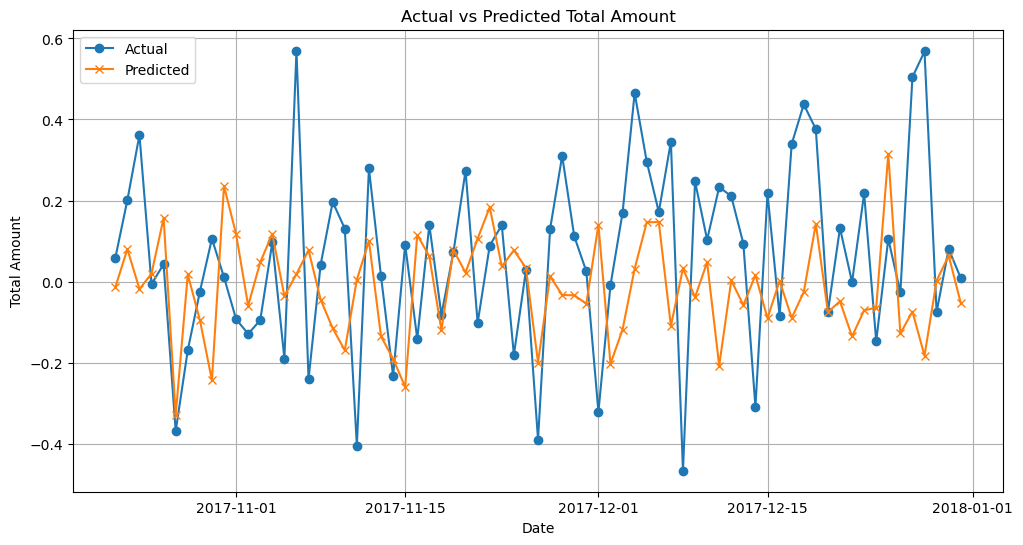

In [356]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual', marker='o')  
plt.plot(y_test.index, y_pred, label='Predicted', marker='x') 

plt.title('Actual vs Predicted Total Amount')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.legend()
plt.grid(True)
plt.show()

In [353]:
y_dummy_forecast = y_test.shift(1).fillna(method='bfill') 

# Calculate the MSE for the dummy forecast
mse_dummy = mean_squared_error(y_test, y_dummy_forecast)

# Compare the MSE of the dummy forecast with your model's MSE
print(f"Mean Squared Error of the model: {mse}")
print(f"Mean Squared Error of the dummy forecast: {mse_dummy}")



Mean Squared Error of the model: 0.07052666325584474
Mean Squared Error of the dummy forecast: 0.10728844004113218


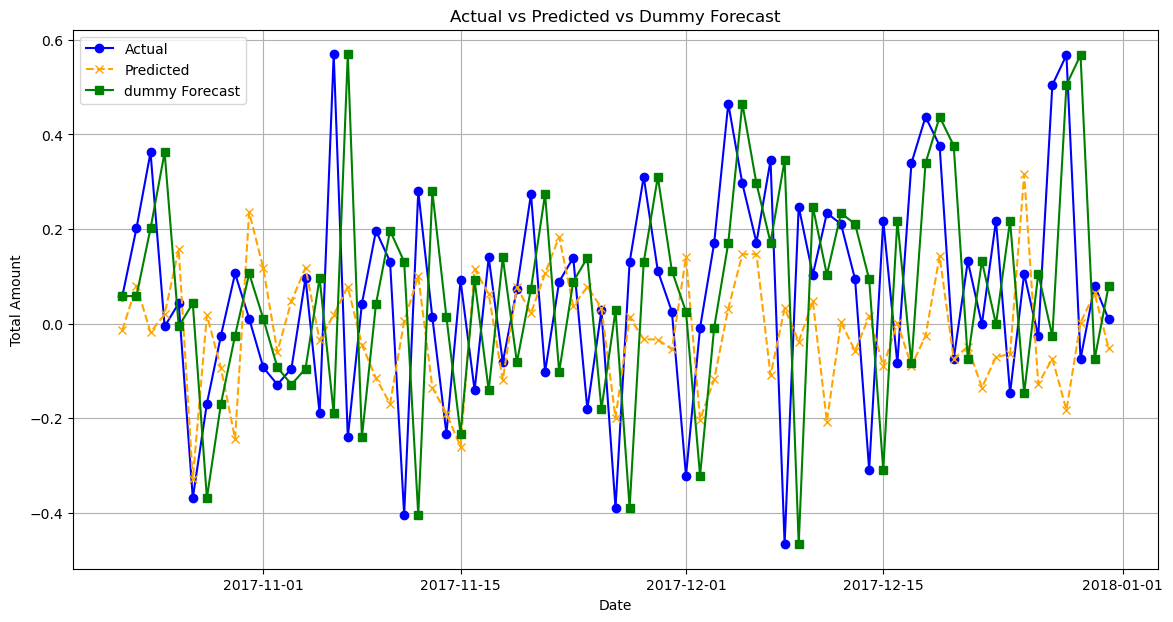

In [355]:
# Plotting the actual vs predicted vs dummy forecast
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, marker='o', label='Actual', linestyle='-', color='blue')
plt.plot(y_test.index, y_pred, marker='x', label='Predicted', linestyle='--', color='orange')
plt.plot(y_test.index, y_dummy_forecast, marker='s', label='dummy Forecast', linestyle='-', color='green')

plt.title('Actual vs Predicted vs Dummy Forecast')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.legend()
plt.grid(True)
plt.show()
